# The importance of 'Studying a Dataset'

Data is the primary ingredient of deep learning, and although it’s our task as neural network programmers to let our neural networks learn from our data, we still have the responsibility of knowing the nature and history of the data we are using to actually do the training.

Computer programs in general consist of two primary components, __code__ and __data__. With traditional programming, the programmer’s job is to directly write the software or code, but with deep learning and neural networks, the software so to speak is the network itself and in particular, the network’s weights that emerge automatically during the training process. It’s the programmer’s job to oversee and guide the learning process though training. We can think of this as an indirect way of writing software or code. By using data and deep learning, neural network programmers can produce software capable of performing computations without writing code to explicitly carry out these computations.

For this reason, the role of data in developing software is shifting, and we’ll likely see the role of software developers shift as well.


__Data focused considerations:__

* Who created the dataset?
* How was the dataset created?
* What transformations were used?
* What intent does the dataset have?
* Possible unintentional consequences?
* Is the dataset biased?
* Are there ethical issues with the dataset?

In practice, acquiring and accessing data is often of the hardest parts of deep learning, so keep this in mind as we go though this particular dataset. Take note of the general concepts and ideas that we see here.



## The ML Pipeline

__Prepare the data__ -> Build the model -> Train the model -> Analyze the model's results

### Data 
The MNIST dataset, Modified National Institute of Standards and Technology database, is a famous dataset of handwritten digits that is commonly used for training image processing systems for machine learning. NIST stands for National Institute of Standards and Technology.

The M in MNIST stands for modified, and this is because there was an original NIST dataset of digits that was modified to give us MNIST.MNIST dataset of 70,000 handwritten digits. 

MNIST is famous because of how often the dataset is used. It’s common for two reasons:

* Beginners use it because it’s easy
* Researchers use it to benchmark (compare) different models.


The dataset consists of 70,000 images of hand written digits with the following split:

- 60,000 training images
- 10,000 testing images


#### Fashion-MNIST https://github.com/zalandoresearch/fashion-mnist.

Fashion-MNIST as the name suggests is a dataset of fashion items. Specifically, the dataset has the following ten classes of fashion items:

| Index |    Label    |
|:-----:|:-----------:|
|   0   | T-shirt/top |
|   1   |   Trouser   |
|   2   |   Pullover  |
|   3   |    Dress    |
|   4   |     Coat    |
|   5   |    Sandal   |
|   6   |    Shirt    |
|   7   |   Sneaker   |
|   8   |     Bag     |
|   9   |  Ankle boot |

#### How Fashion-MNIST Was Built
Unlike the MNIST dataset, the fashion set wasn’t hand-drawn, but the images in the dataset are actual images from Zalando’s website.

However, they have been transformed to more closely correspond to the MNIST specifications. This is the general conversion process that each image from the site went through:

- Converted to PNG
- Trimmed
- Resized
- Sharpened
- Extended
- Negated
- Gray-scaled

There are four general steps that we’ll be following as we move through this project:

- Prepare the data
- Build the model
- Train the model
- Analyze the model’s results

#### PyTorch Imports

|Package                	|Description                                                                                                            
---------------------------------------------------------------------------------------------------------------------------------	|
| torch                  	| The top-level PyTorch package and tensor library.                                                     |
| torch.nn               	| A subpackage that contains modules and extensible classes for building neural networks.               |
| torch.optim            	| A subpackage that contains standard optimization operations like SGD and Adam.                        |
| torch.nn.functional    	| A functional interface that contains typical operations used for building neural networks like loss functions and convolutions. 	|
| torchvision            	| A package that provides access to popular datasets, model architectures, and image transformations for computer vision.         	|
| torchvision.transforms 	| An interface that contains common transforms for image processing.                                    |

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

To prepare data, we'll be following what is loosely known as an ETL process.

* __Extract__ data from a data source.
* __Transform__ data into a desirable format.
* __Load__ data into a suitable structure.


For these purposes, PyTorch provides us with two classes:

| Class                       	| Description                                                 	|
|-----------------------------	|-------------------------------------------------------------	|
| torch.utils.data.Dataset    	| An abstract class for representing a dataset.               	|
| torch.utils.data.DataLoader 	| Wraps a dataset and provides access to the underlying data. 	|

An __abstract class__ is a Python class that has methods we must implement, so we can create a custom dataset by creating a subclass that extends the functionality of the Dataset class.

Creating a custom dataset in PyTorch is a two-step process: 
 * Extend the `torch.utils.data.Dataset` class by creating a subclass that implements these required methods. 
 * The new subclass is passed to the PyTorch `torch.utils.data.DataLoader` object. 

All subclasses of the Dataset class must override `__len__`, that provides the size of the dataset, and `__getitem__`, supporting integer indexing in range from 0 to len(self) exclusive.

 
We will be using the fashion-MNIST dataset that comes built-in with the torchvision package, so we won’t have to do this for our project. Just know that the Fashion-MNIST built-in dataset class is doing this behind the scenes.

In our case: Get Fashion-MNIST from source -> Put our data into `tensor` form -> Put our data into an object to make it easily accessible (e.g. `DataLoader`).

#### Torchvision

The `torchvision` package, gives us access to the following resources:

* Datasets (like MNIST and Fashion-MNIST)
* Models (like VGG16)
* Transforms
* Utils


In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz
 97%|█████████▋| 25640960/26421880 [00:06<00:00, 5416377.71it/s]Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw

0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz

 56%|█████▌    | 16384/29515 [00:00<00:00, 114695.33it/s]

0it [00:00, ?it/s]Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


  0%|          | 0/4422102 [00:00<?, ?it/s]

  0%|          | 16384/4422102 [00:00<00:35, 124916.11it/s]

  1%|          | 49152/4422102 [00:00<00:29, 146910.51it/s]

  2%|▏         | 106496/4422102 [00:00<00:23, 183698.13it/s]

  5%|▌         | 221184/4422102 [00:00<00:17, 241235.36it/s]

 10%|█         | 458752/4422102 [00:00<00:12, 

| Parameter | Description                                                                        |
|-----------|------------------------------------------------------------------------------------|
| root      | The location on disk where the data is located.                                    |
| train     | If the dataset is the training set                                                 |
| download  | If the data should be downloaded.                                                  |
| transform | A composition of transformations that should be performed on the dataset elements. |


Since we want our images to be transformed into tensors, we use the built-in `transforms.ToTensor()` transformation, and since this dataset is going to be used for training, we’ll name the instance `train_set`.

In [3]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

32768it [02:29, 219.32it/s]   
4423680it [02:28, 29698.93it/s]  
8192it [02:26, 55.78it/s]               
26427392it [02:36, 169014.05it/s] 


In [12]:
len(train_set)

60000

In [13]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [14]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

For class imbalance: https://arxiv.org/abs/1710.05381

In [15]:
sample = next(iter(train_set))

In [16]:
len(sample)

2

In [17]:
type(sample)

tuple

In [18]:
image,label = sample       # sequence unpacking

In [19]:
image.shape     # 1 Channel with image size of 28x28

torch.Size([1, 28, 28])

In [20]:
type(label)

int

In [21]:
torch.tensor(label).shape

torch.Size([])

label:  9


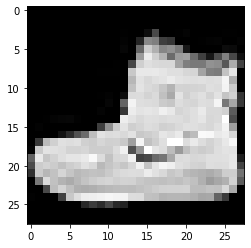

In [22]:
plt.imshow(image.squeeze(), cmap='gray')
print('label: ', label)

### Working with Batches

In [23]:
batch = next(iter(train_loader))

In [24]:
len(batch)

2

In [25]:
type(batch)

list

In [26]:
images, labels = batch

In [27]:
images.shape

torch.Size([10, 1, 28, 28])

In [28]:
torch.tensor(labels).shape

torch.Size([10])

Labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


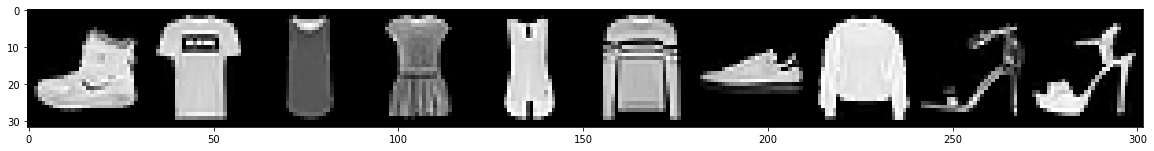

In [29]:
grid = torchvision.utils.make_grid(images, nrow = 10)

plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print("Labels: ", labels)

Labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


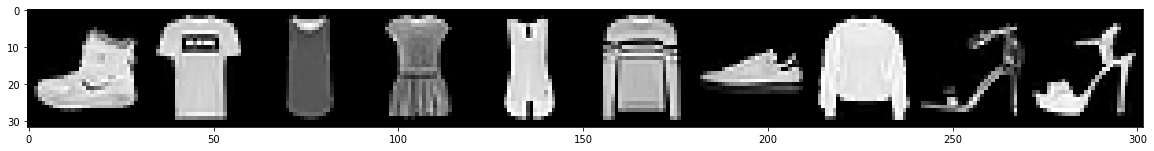

In [30]:
grid = torchvision.utils.make_grid(images, nrow = 10)

plt.figure(figsize=(20,20))
plt.imshow(grid.permute(1, 2, 0))

print("Labels: ", labels)

### How To Plot Images Using PyTorch DataLoader

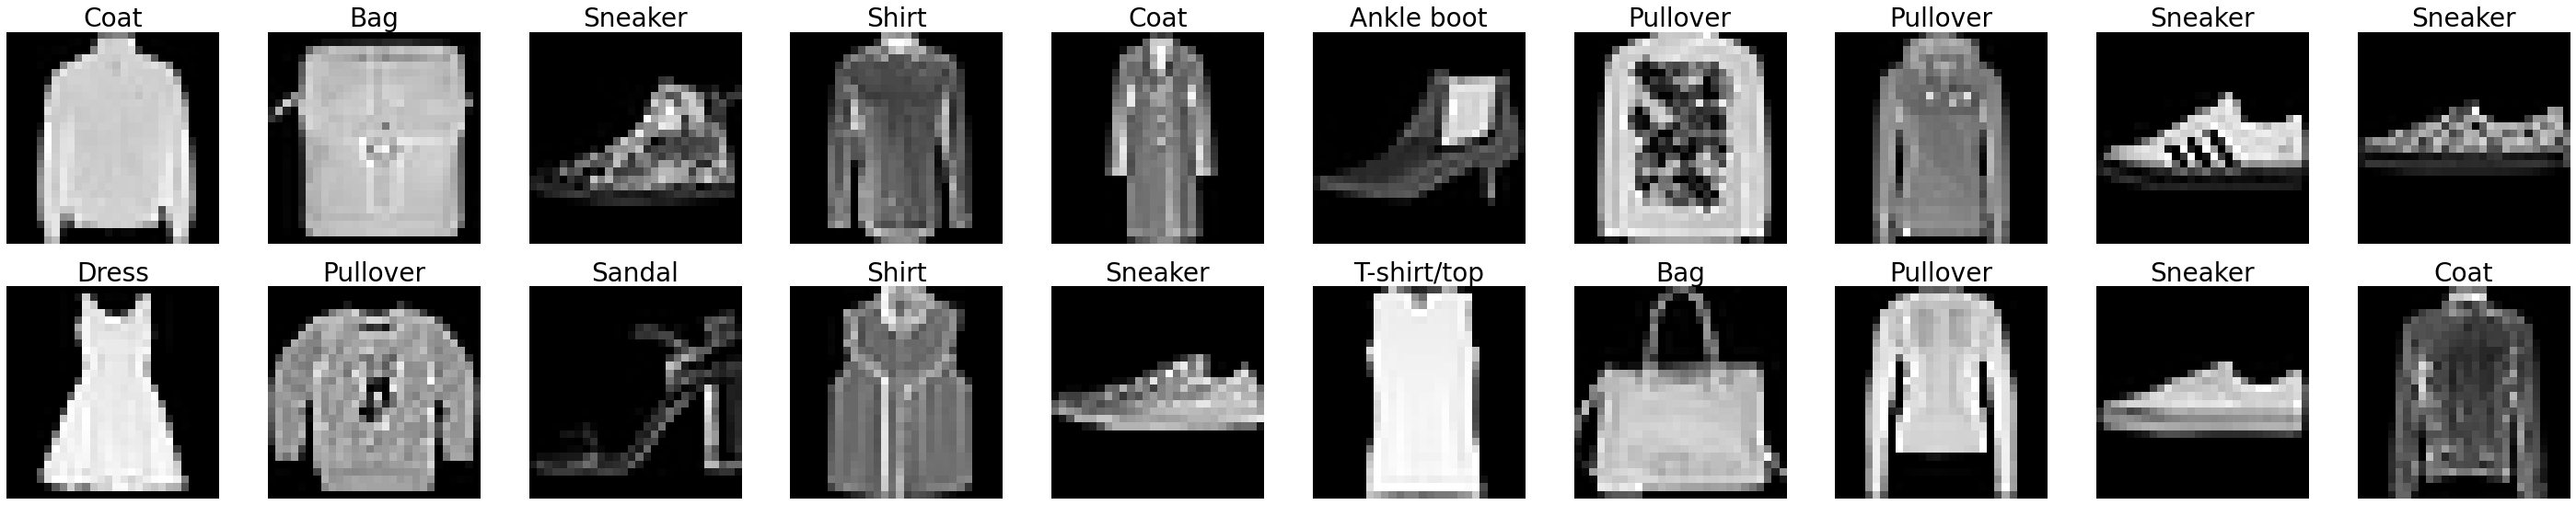

In [31]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()